#Prediccion de reprobación de biologia en 1 medio


In [ ]:
# Predicción de reprobacion en Biología 1 medio Este proyecto busca predecir si
# un estudiante de 1º medio reprobará Biología al final del año escolar,usando los siguientes datos:
# nota 1
# nota 2
# % asistencia a clases
# % asistencia a laboratorios
# Promedio
# Aprobado Reprobado.

Explicación de cada columna.

# Nombre: Identificador del estudiante.(estudiante 1, estudiante 2, etc. )
# Nota: Notas obtenidas en evaluaciones parciales de la asignatura de Biología (1.0 a 7.0)
# Asistencia clases (%): Porcentaje de asistencia del estudiante a clases regulares (0% a 100%)
# Asistencia Laboratorio: Porcentaje de asistencia del estudiante a sesiones practicas en laboratorio de Biología.(0% a 100%)
# Promedio: Promedio final del estudiante en la asignatura.(0 a 70)
# Aprobado/Reprobado: Indica si el estudiante aprobó o no el ramo.(A: aprobado, R: reprobado)





In [ ]:
# cargar la libreria
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt  # Importar matplotlib.pyplot como plt
import seaborn as sns             # Importar seaborn como sns

# Cargar el archivo de datos.
df = pd.read_csv('01database.csv', sep=';')
df.head()

,Nombre,Nota 1,Nota 2,Nota 3,Nota 4,Asistencia Clases (%),Asistencia Laboratorio (%),Promedio,Aprobado/reprobado
0,Estudiante 1,"4,5","6,8","5,9","5,4",96,97,"5,6",Aprobado
1,Estudiante 2,"3,6","3,6","3,2","6,5",70,77,"4,2",Aprobado
2,Estudiante 3,"5,4","5,8","3,1","6,9",86,74,"5,3",Aprobado
3,Estudiante 4,"6,3","3,8","3,7","3,7",82,85,"4,4",Aprobado
4,Estudiante 5,"4,2","5,1","4,7","4,2",85,100,"4,6",Aprobado


In [ ]:
df.info('01database.csv') #Inspeccionar el contenido (tipo de datos y si hay nulos)
df.shape # filas, columnas
df.columns # Ver nombres de columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Nombre                      30 non-null     object
 1   Nota 1                      30 non-null     object
 2   Nota 2                      30 non-null     object
 3   Nota 3                      30 non-null     object
 4   Nota 4                      30 non-null     object
 5   Asistencia Clases (%)       30 non-null     int64 
 6   Asistencia Laboratorio (%)  30 non-null     int64 
 7   Promedio                    30 non-null     object
 8   Aprobado/reprobado          30 non-null     object
dtypes: int64(2), object(7)
memory usage: 2.2+ KB


Index(['Nombre', 'Nota 1', 'Nota 2', 'Nota 3', 'Nota 4',
       'Asistencia Clases (%)', 'Asistencia Laboratorio (%)', 'Promedio',
       'Aprobado/reprobado'],
      dtype='object')

In [ ]:
df.describe() # Sólo columnas numéricas
df.describe (include='all') # Todas las columnas

,Nombre,Nota 1,Nota 2,Nota 3,Nota 4,Asistencia Clases (%),Asistencia Laboratorio (%),Promedio,Aprobado/reprobado
count,30,30,30,30,30,30.000000,30.000000,30,30
unique,30,23,22,18,23,NaN,NaN,19,2
top,Estudiante 1,"5,4","6,8","4,2","6,5",NaN,NaN,"4,4",Aprobado
freq,1,3,2,3,2,NaN,NaN,3,26
mean,NaN,NaN,NaN,NaN,NaN,86.933333,82.300000,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,7.759014,9.660263,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,66.000000,60.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,82.500000,75.250000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,86.500000,81.500000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,90.000000,89.000000,NaN,NaN


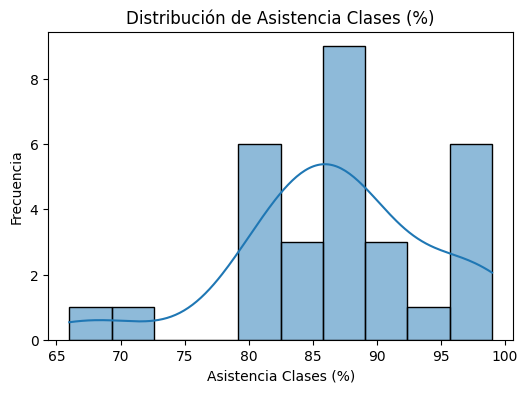

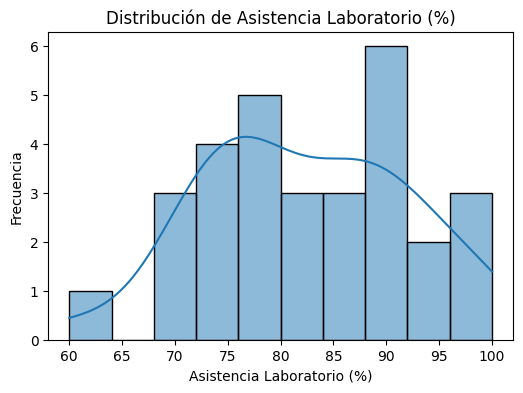

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns # Histograma por columna numérica

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [ ]:
df.isnull().sum()  # Cuántos valores faltan por columna
df.duplicated().sum()  # Filas duplicadas

np.int64(0)

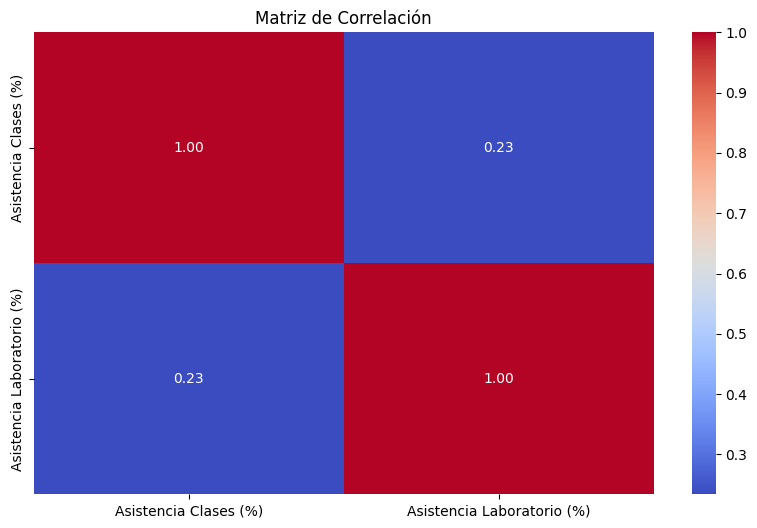

In [ ]:
# Excluir la columna 'Nombre' y otras columnas no numéricas antes de calcular la correlación
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
# Calcular la correlación solo entre columnas numéricas
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload('01database.csv')

FileExistsError: [Errno 17] File exists: '01database.csv'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar el CSV (ajusta el nombre si tu archivo tiene otro)
df = pd.read_csv("01database.csv", sep=';')

# Limpiar nombres de columnas
df.columns = df.columns.str.strip()

# Corregir formatos de números: convertir "4 5" → 4.5
for col in df.columns:
    if col not in ['Nombre', 'Aprobado/reprobado']:
        df[col] = df[col].astype(str).str.replace(' ', '.').str.replace(',', '.')
        df[col] = pd.to_numeric(df[col], errors='coerce')  # convertir a float

In [ ]:
#estado del dataset
print("Valores nulos por columna:\n", df.isnull().sum())
print("\nDuplicados:", df.duplicated().sum())

numeric_cols = df.select_dtypes(include='number').columns
print("\nValores en cero:\n", (df[numeric_cols] == 0).sum())

# transformar valores cualitativos en numericos
df['Resultado_binario'] = df['Aprobado/reprobado'].map({'Aprobado': 1, 'Reprobado': 0})

# Normalizar columnas numericas
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

Valores nulos por columna:
 Nombre                        0
Nota 1                        0
Nota 2                        0
Nota 3                        0
Nota 4                        0
Asistencia Clases (%)         0
Asistencia Laboratorio (%)    0
Promedio                      0
Aprobado/reprobado            0
Resultado_binario             0
dtype: int64

Duplicados: 0

Valores en cero:
 Nota 1                        0
Nota 2                        0
Nota 3                        0
Nota 4                        0
Asistencia Clases (%)         0
Asistencia Laboratorio (%)    0
Promedio                      0
Resultado_binario             4
dtype: int64


In [ ]:
# transformar valores cualitativos en numericos
df['Resultado_binario'] = df['Aprobado/reprobado'].map({'Aprobado': 1, 'Reprobado': 0})

In [ ]:
# Normalizar columnas numericas
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
# detectar valores atipicos
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)].shape[0]

print("Outliers detectados por columna:\n", outliers)

Outliers detectados por columna:
 {'Nota 1': 0, 'Nota 2': 0, 'Nota 3': 0, 'Nota 4': 0, 'Asistencia Clases (%)': 2, 'Asistencia Laboratorio (%)': 0, 'Promedio': 0, 'Resultado_binario': 4}


In [ ]:
# eliminar duplicados
df_cleaned = df.drop_duplicates()
print("Filas después de eliminar duplicados:", df_cleaned.shape[0])

Filas después de eliminar duplicados: 30
